<a href="https://colab.research.google.com/github/saurabhshinkar/BRS/blob/main/Book_Recommendation_System_Saurabh_Shinkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Book Recommendation System**

### <b> Problem Description </b>
###During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.


### In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
###Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## <b> Data Description </b>

The Book-Crossing dataset comprises 3 files.

### <b>Users: </b>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

### <b>Books: </b> 
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S,Image-URL-M, Image-URL-L), i.e., small, medium large. These URLs point to the Amazon website.

### <b>Ratings: </b> 
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.




# **Importing** **Libraries**

In [1]:
#Import all library that will be used in entire project
#!pip install scikit-surprise
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix,accuracy_score,f1_score,roc_curve, roc_auc_score,classification_report,precision_score, recall_score
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
 
import ast
 
from sklearn.metrics.pairwise import cosine_similarity
 
import seaborn as sns
 
import numpy as np
 
import matplotlib.pyplot as plt
 
from sklearn.neighbors import NearestNeighbors
 
from scipy.sparse import csr_matrix
 
from surprise import Reader, Dataset
 
from surprise.model_selection import train_test_split
 
from surprise import SVDpp, accuracy
 
from surprise.model_selection import cross_validate
 
from collections import defaultdict
 
from surprise import SVD, SVDpp, NMF
 
from surprise import SlopeOne, CoClustering
 
import matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 7.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633998 sha256=f4a58a7bc635e9c5b8b494e7add4c7ffc453622799ea93573ac19d5d587c75c0
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


# **Mount Drive And Import Data**

In [2]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing users data
File_path='/content/drive/MyDrive/Capstone Projects/Book Recommendation System/'
users= pd.read_csv(File_path + 'Users.csv')

#Importing books data
books= pd.read_csv(File_path + 'Books.csv')

#Importing ratings data
ratings= pd.read_csv(File_path + 'Ratings.csv')

In [4]:
# First Look 
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [5]:
# First Look 
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [6]:
# First Look 
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [7]:
#data information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
#data information
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
#data information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


# **Handling Missing Vaules**

**Users Dataset**

In [10]:
# Missing Value Count Function
def show_missing():
    missing = users.columns[users.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(users[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(users[show_missing()].isnull().sum().sort_values(ascending = False)/len(users)*100,2))

Missing Data Count
Age    110762
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age    39.72
dtype: float64


In [11]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

minimum age 0 and max age 244? so outliers exist in age

Age is positively skewed.
Median imputation is preferable for skewed distribution(be it right or left). 
So we will replace nulls with median in Age column. Outliers affect the mean value of the data but have little effect on the median or mode of a given set of data so we can impute nulls with median before removing outliers.

In [12]:
#Fill NaN Values in Age Column with Median
users['Age'] =users['Age'].fillna(users['Age'].median())

In [13]:
#Capping the outlier rows with Percentiles
upper_lim = users['Age'].quantile(.95)
lower_lim = users['Age'].quantile(.05)
users.loc[(users["Age"] > upper_lim),"Age"] = upper_lim
users.loc[(users["Age"] < lower_lim),"Age"] = lower_lim

In [14]:
upper_lim

56.0

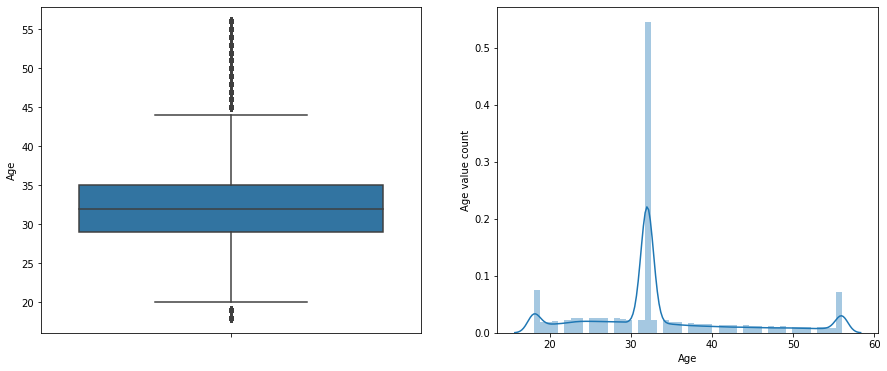

In [15]:
#Boxplot and distplot of Age
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=users["Age"])
fig.set_title('')
fig.set_ylabel("Age")
    
plt.subplot(1, 2, 2)
fig = sns.distplot(users["Age"].dropna())
fig.set_ylabel('Age value count')
fig.set_xlabel("Age")

plt.show()

In [16]:
users['Age'].describe()

count    278858.000000
mean         33.402570
std           9.523058
min          18.000000
25%          29.000000
50%          32.000000
75%          35.000000
max          56.000000
Name: Age, dtype: float64

In [17]:
users['locat']=users.Location.apply(lambda x: x.split(', '))
users['Country']=users.locat.apply(lambda x: x[2] if len(x)==3 else 'n/a')
users.drop('locat',axis=1,inplace=True)

**Books Dataset**

In [18]:
# Missing Value Count Function
def show_missing():
    missing = books.columns[books.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(books[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(books[show_missing()].isnull().sum().sort_values(ascending = False)/len(books)*100,2))

Missing Data Count
Image-URL-L    3
Publisher      2
Book-Author    1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Image-URL-L    0.0
Publisher      0.0
Book-Author    0.0
dtype: float64


In [19]:
#Dropping Nulls of Books data as they are negligible
books.dropna(inplace=True)

In [20]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [21]:
#converting Reviews type into integer
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'])

In [22]:
#Capping the outlier rows with Percentiles
upper_lim = books['Year-Of-Publication'].quantile(.95)
lower_lim = books['Year-Of-Publication'].quantile(.05)
books.loc[(books["Year-Of-Publication"] > upper_lim),"Year-Of-Publication"] = upper_lim
books.loc[(books["Year-Of-Publication"] < lower_lim),"Year-Of-Publication"] = lower_lim

In [23]:
upper_lim

2003.0

In [24]:
lower_lim

1976.0

**Ratings Dataset**

In [25]:
# Missing Value Count Function
def show_missing():
    missing = ratings.columns[ratings.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(ratings[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


# **Cleaning Data**

In [26]:
users.head(1)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",32.0,usa


In [27]:
users.shape

(278858, 4)

In [28]:
ratings.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [29]:
ratings.shape

(1149780, 3)

Merging users and ratings dataset on User-ID column

In [30]:
#Merging both data 
data_users_ratings=pd.merge(users,ratings, on='User-ID')

Merging combined data of users and ratings with books data on ISBN column

In [31]:
#Merging both data
merged=pd.merge(books,data_users_ratings, on='ISBN')

In [32]:
#info
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1031128
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031129 non-null  object 
 1   Book-Title           1031129 non-null  object 
 2   Book-Author          1031129 non-null  object 
 3   Year-Of-Publication  1031129 non-null  int64  
 4   Publisher            1031129 non-null  object 
 5   Image-URL-S          1031129 non-null  object 
 6   Image-URL-M          1031129 non-null  object 
 7   Image-URL-L          1031129 non-null  object 
 8   User-ID              1031129 non-null  int64  
 9   Location             1031129 non-null  object 
 10  Age                  1031129 non-null  float64
 11  Country              1031129 non-null  object 
 12  Book-Rating          1031129 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 110.1+ MB


In [33]:
# Missing Value Count Function
def show_missing():
    missing = ratings.columns[ratings.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(ratings[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(ratings[show_missing()].isnull().sum().sort_values(ascending = False)/len(ratings)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [34]:
merged.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",32.0,canada,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",49.0,canada,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",32.0,n/a,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",32.0,canada,0


In [35]:
merged.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1,inplace=True)

In [36]:
merged.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,"ottawa, ontario, canada",49.0,canada,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,"n/a, n/a, n/a",32.0,n/a,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,"sudbury, ontario, canada",32.0,canada,0


In [37]:
np.set_printoptions(threshold=10)

In [38]:
merged.ISBN.unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

In [39]:
merged['Book-Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [40]:
merged['Book-Author'].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

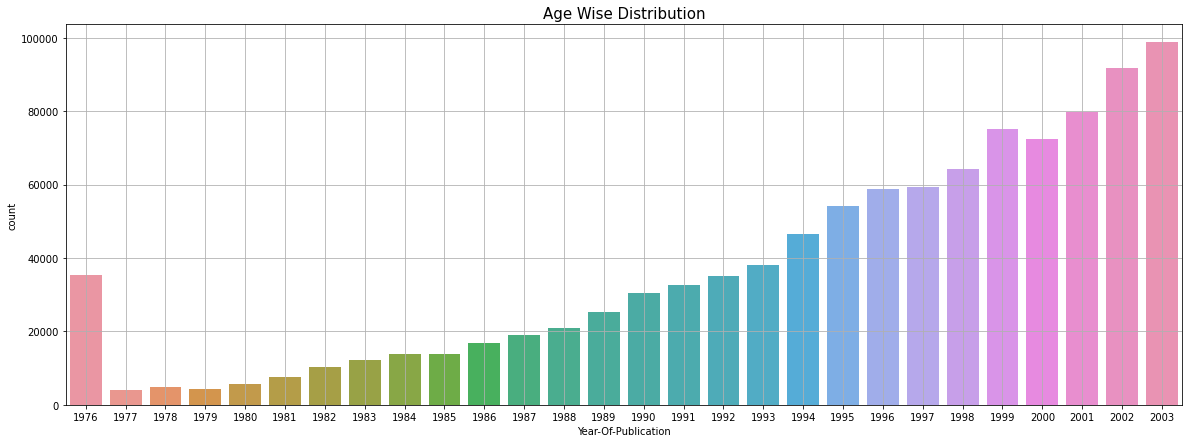

In [41]:
#barplot of age and its counts 
plt.figure(figsize=(20,7))
sns.countplot(x = merged['Year-Of-Publication'])
plt.title('Age Wise Distribution',fontsize=15)
plt.grid()
plt.show()

In [42]:
merged['Year-Of-Publication'].unique()

array([2002, 2001, 1991, ..., 1989, 1984, 1977])

In [43]:
merged['Year-Of-Publication'].unique()

array([2002, 2001, 1991, ..., 1989, 1984, 1977])

In [44]:
#pd.set_option('display.max_rows', 50000)

In [45]:
merged.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5


In [46]:
merged.Country.value_counts()

usa                                  745812
canada                                92954
n/a                                   37573
united kingdom                        32007
germany                               27654
                                      ...  
hungary"                                  1
c                                         1
samoa                                     1
zambia                                    1
usa (currently living in england)         1
Name: Country, Length: 281, dtype: int64

Duplicates

In [47]:
merged.duplicated().any()

False

##**EDA**

In [48]:
merged.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5


In [49]:
#Top 10 Books by mean rating
Books_by_mean_rating=merged.groupby('Book-Title')['Book-Rating'].median().reset_index(name="Median Rating").sort_values(by=['Median Rating'], ascending =False)
Books_by_mean_rating.head(50)

,Book-Title,Median Rating
39864,Corto Maltese : La Ballade de la mer salÃ?Â©e,10.0
114327,Madita. ( Ab 8 J.).,10.0
198823,The Mushroom Book: Recipes for Earthly Delights,10.0
62488,Evilution,10.0
198841,The Music of Black Americans: A History,10.0
21203,Becoming a Critical Thinker: A User Friendly M...,10.0
114280,"Made in Goatswood (Call of Cthulhu, No 8)",10.0
198861,The Mustard Seed: Discourses on the Sayings of...,10.0
21195,Becoming Visible : An Illustrated History of L...,10.0
198867,The Mute Stones Speak: The Story of Archaeolog...,10.0


Top 10 sold books

In [50]:
Top10_Book=merged['Book-Title'].value_counts().reset_index().head(10)
Top10_Book.rename(columns={'index':'Book-Title','Book-Title':'Count'},inplace=True)
Top10_Book

,Book-Title,Count
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828
5,Bridget Jones's Diary,815
6,The Secret Life of Bees,774
7,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
8,The Red Tent (Bestselling Backlist),723
9,Angels &amp; Demons,670


books with same title but different author

In [51]:
books['Book-Title'].value_counts()

Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
Dracula                                                                                                                           20
The Secret Garden                                                                                                                 20
                                                                                                                                  ..
On a Clear Day You Can See General Motors: John Z. De Lorean's Look Inside the Automotive Giant                                    1
What Every Kid Should Know                                           

In [52]:
books[books['Book-Title']=='Selected Poems']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4523,081120958X,Selected Poems,William Carlos Williams,1985,New Directions Publishing Corporation,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...
39416,0811201465,Selected Poems,K. Patchen,1976,New Directions Publishing Corporation,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...
41316,0679750800,Selected Poems,Rita Dove,1993,Vintage Books USA,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...
106885,0060931744,Selected Poems,Gwendolyn Brooks,1999,Perennial,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...
118775,0517101548,Selected Poems,John Donne,1994,Gramercy Books,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...
127462,0520012984,Selected Poems,Paul Verlaine,1976,University of California Press,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...
156894,0871401541,Selected Poems,E. E. Cummings,1994,Liveright Publishing Corporation,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...
158312,0060909897,Selected Poems,Gwendolyn Brooks,1976,Harpercollins,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...
175602,0571050190,Selected Poems,T. T Gunn,1976,Farrar Straus &amp; Giroux,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...
183908,1550651498,Selected Poems,Ralph Gustafson,2001,Vehicule Press,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...


In [53]:
merged.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5


Top 10 author

In [54]:
Top10_author=books['Book-Author'].value_counts().reset_index().head(10)
Top10_author.rename(columns={'index':'Book-Author','Book-Author':'Count'},inplace=True)
Top10_author

,Book-Author,Count
0,Agatha Christie,632
1,William Shakespeare,567
2,Stephen King,524
3,Ann M. Martin,423
4,Carolyn Keene,373
5,Francine Pascal,372
6,Isaac Asimov,330
7,Nora Roberts,315
8,Barbara Cartland,307
9,Charles Dickens,302


In [55]:
Top10_Year=merged['Year-Of-Publication'].value_counts().reset_index().head(10)
Top10_Year.rename(columns={'index':'Year-Of-Publication','Year-Of-Publication':'Count'},inplace=True)
Top10_Year

,Year-Of-Publication,Count
0,2003,98714
1,2002,91799
2,2001,79800
3,1999,75194
4,2000,72326
5,1998,64208
6,1997,59357
7,1996,58825
8,1995,54090
9,1994,46444


In [56]:
merged.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Country,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,"stockton, california, usa",18.0,usa,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,canada,5


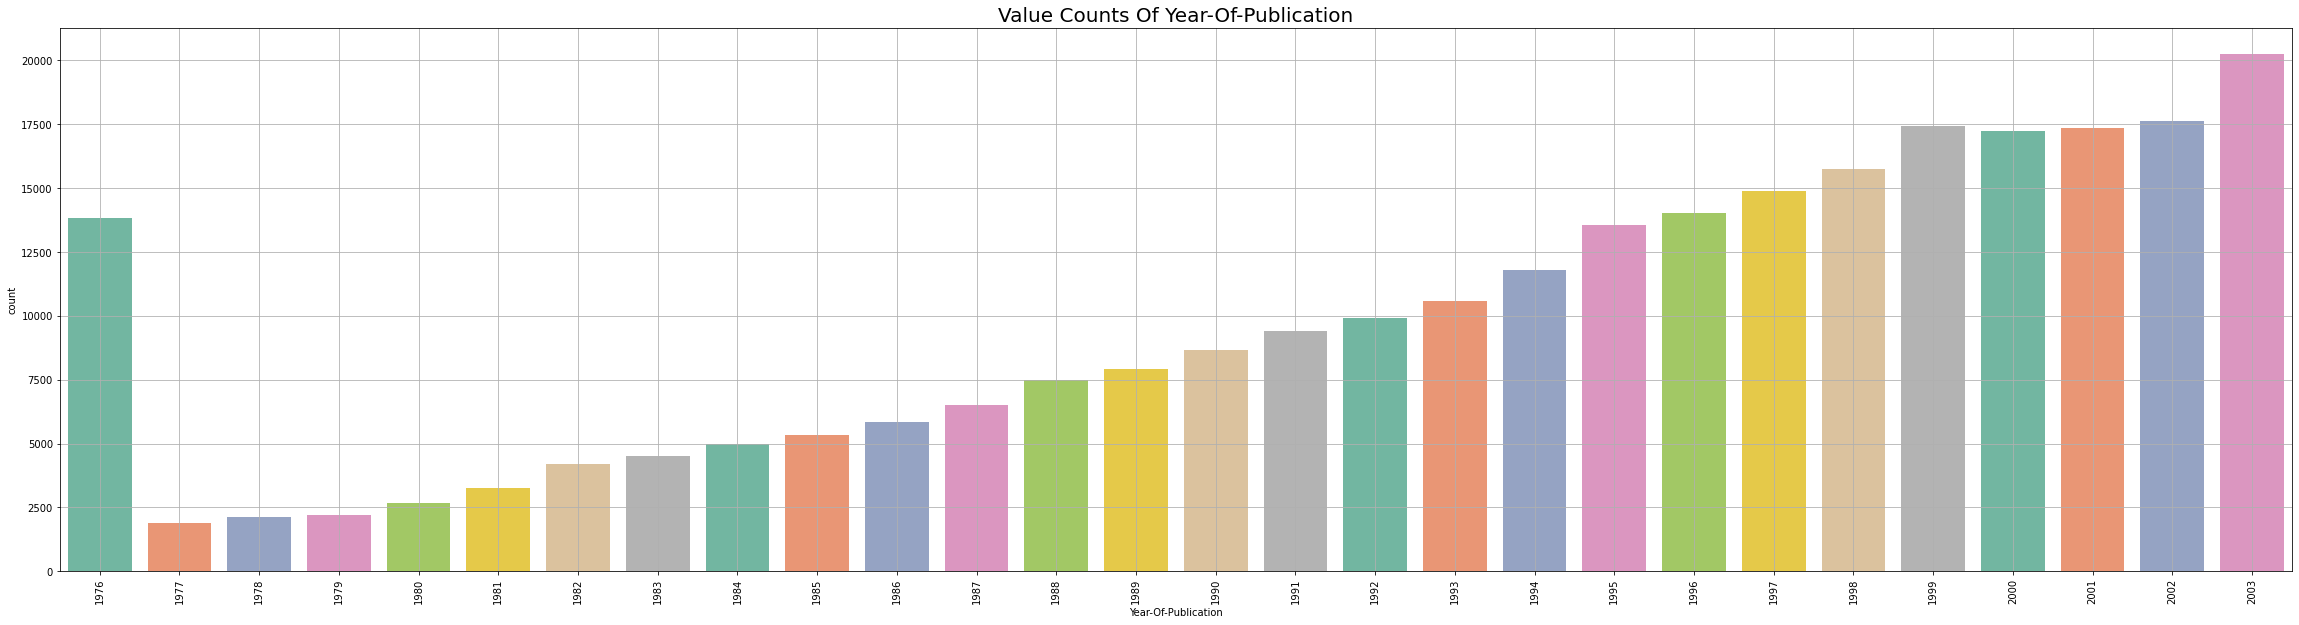

In [57]:
#Value Counts Of Year-Of-Publication
plt.rcParams['figure.figsize'] = (40,10)
fig = sns.countplot(x=books['Year-Of-Publication'],palette="Set2")
plt.xticks(rotation=90, horizontalalignment="center")
plt.grid()

plt.title("Value Counts Of Year-Of-Publication",fontsize=20)

plt.show()

Top 10 publisher

In [58]:
Top10_Country=merged['Country'].value_counts().reset_index().head(10)
Top10_Country.rename(columns={'index':'Country','Country':'Count'},inplace=True)
Top10_Country

,Country,Count
0,usa,745812
1,canada,92954
2,n/a,37573
3,united kingdom,32007
4,germany,27654
5,australia,18217
6,spain,14773
7,france,10631
8,portugal,6975
9,new zealand,5556


Text(0.5, 1.0, 'Distribution Plot Of Age')

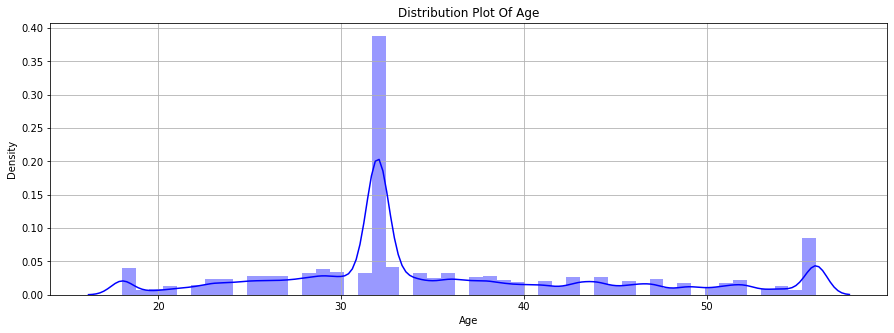

In [59]:
#Distribution Plot Of Age
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(merged['Age'],color="blue")
plt.grid()
plt.title('Distribution Plot Of Age')

In [60]:
ratings['Book-Rating'] != 0

0          False
1           True
2          False
3           True
4           True
           ...  
1149775     True
1149776    False
1149777     True
1149778     True
1149779     True
Name: Book-Rating, Length: 1149780, dtype: bool

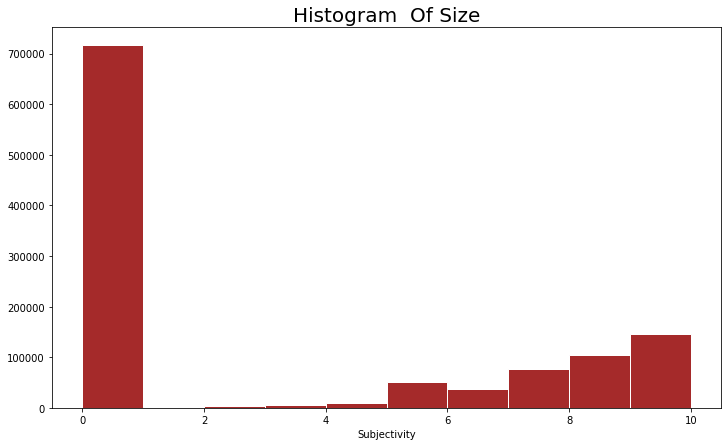

In [61]:
#Histogram Of Book-Rating
plt.figure(figsize=(12,7))
plt.xlabel("Subjectivity")
plt.title("Histogram  Of Size",fontsize=20)
plt.hist(ratings['Book-Rating'],color="brown",edgecolor="white")
plt.show()

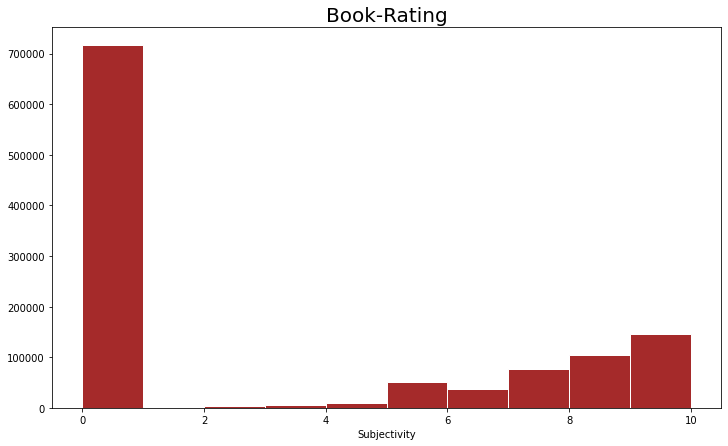

In [62]:
#Histogram Of Book-Rating
plt.figure(figsize=(12,7))
plt.xlabel("Subjectivity")
plt.title("Book-Rating",fontsize=20)
plt.hist(ratings['Book-Rating'],color="brown",edgecolor="white")
plt.show()

# Collaborative filtering models Used


###**Data Preparation**

In [63]:
ratings.head(1)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0


In [64]:
ratings= ratings[ratings['Book-Rating'] != 0]

In [65]:
ratings.isna().any()

User-ID        False
ISBN           False
Book-Rating    False
dtype: bool

In [66]:
#Merging both data 
df=pd.merge(ratings,books, on='ISBN')

In [67]:
df.isna().any()

User-ID                False
ISBN                   False
Book-Rating            False
Book-Title             False
Book-Author            False
Year-Of-Publication    False
Publisher              False
Image-URL-S            False
Image-URL-M            False
Image-URL-L            False
dtype: bool

In [68]:
df.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1,inplace=True)

In [ ]:
df.head(3)

###**KNN**

In [69]:
# Books that rated by atleast 10 users
books_interactions_count_df = df.groupby(['ISBN', 'User-ID']).size().groupby('ISBN').size()
print('# of books: %d' % len(books_interactions_count_df))

books_with_enough_interactions_df = books_interactions_count_df[books_interactions_count_df >= 10].reset_index()[['ISBN']]
print('# of books with at least 10 interactions: %d' % len(books_with_enough_interactions_df))
print(books_with_enough_interactions_df.head(1))

# of books: 149832
# of books with at least 10 interactions: 5444
         ISBN
0  0002558122


In [70]:
#users which have rated atleast 25 different books
users_interactions_count_df = df.groupby(['User-ID', 'ISBN']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 25].reset_index()[['User-ID']]
print('# of users with at least 25 interactions: %d' % len(users_with_enough_interactions_df))
print(users_with_enough_interactions_df.head(1))

# of users: 68091
# of users with at least 25 interactions: 2604
   User-ID
0      254


In [71]:
users_interactions_count_df.head(1)

User-ID
8    7
dtype: int64

In [72]:
print('# of interactions: %d' % len(df))
interactions_from_selected_users_df = df.merge(users_with_enough_interactions_df, 
               how = 'right',
               on = 'User-ID')
print('# of interactions from users with at least 25 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383838
# of interactions from users with at least 25 interactions: 202455


In [73]:
print('# of interactions: %d' % len(df))
interactions_from_selected_books_and_users_df= interactions_from_selected_users_df.merge(books_with_enough_interactions_df, on = 'ISBN')
print('# of interactions from users with at least 25 interactions and books with at least 10 interactions: %d' % len(interactions_from_selected_books_and_users_df))

# of interactions: 383838
# of interactions from users with at least 25 interactions and books with at least 10 interactions: 63541


In [74]:
interactions_from_selected_books_and_users_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,254,0671021001,7,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket
1,2977,0671021001,9,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket
2,6563,0671021001,2,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket
3,8253,0671021001,10,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket
4,11718,0671021001,8,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket
...,...,...,...,...,...,...,...
63536,261829,0743406125,8,Year Zero,Jeff Long,2003,Pocket Star
63537,267635,0743406125,7,Year Zero,Jeff Long,2003,Pocket Star
63538,261998,0312980388,10,Warlock : A Novel of Ancient Egypt,Wilbur Smith,2002,St. Martin's Paperbacks
63539,263733,3442760003,10,Liebesleben,Zeruya Shalev,2002,Distribooks


In [75]:
interactions_from_selected_books_and_users_df.isna().any()

User-ID                False
ISBN                   False
Book-Rating            False
Book-Title             False
Book-Author            False
Year-Of-Publication    False
Publisher              False
dtype: bool

In [76]:
interactions_from_selected_books_and_users_df.shape

(63541, 7)

In [77]:
interactions_from_selected_books_and_users_df=interactions_from_selected_books_and_users_df.dropna()

In [78]:
interactions_from_selected_books_and_users_df.shape

(63541, 7)

In [79]:
interactions_from_selected_books_and_users_df.head(1)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,254,0671021001,7,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket


In [80]:
import math

In [81]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df1 = interactions_from_selected_books_and_users_df.groupby(['User-ID', 'Book-Title'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df1))
interactions_full_df1.head(2)

# of unique user/item interactions: 63228


,User-ID,Book-Title,Book-Rating
0,254,1984,3.321928
1,254,American Gods,3.459432


In [82]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_books_and_users_df.groupby(['User-ID', 'ISBN'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head(2)

# of unique user/item interactions: 63541


,User-ID,ISBN,Book-Rating
0,254,0060934700,3.321928
1,254,0064471047,3.000000


In [83]:
interactions_full_df.shape

(63541, 3)

In [84]:
from sklearn.model_selection import train_test_split as sklearn_train_test_split

In [85]:
interactions_train_df1, interactions_test_df1 = sklearn_train_test_split(interactions_full_df1, test_size=0.20, random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df1))
print('# interactions on Test set: %d' % len(interactions_test_df1))

# interactions on Train set: 50582
# interactions on Test set: 12646


In [86]:
interactions_train_df, interactions_test_df = sklearn_train_test_split(interactions_full_df, test_size=0.20, random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 50832
# interactions on Test set: 12709


In [87]:
df_user_item_matrix1 = interactions_train_df1.pivot(index='Book-Title',columns='User-ID',values='Book-Rating').fillna(0)

In [88]:
df_user_item_matrix = interactions_train_df.pivot(index='ISBN',columns='User-ID',values='Book-Rating').fillna(0)

In [89]:
user_item_matrix_sparse1 = csr_matrix(df_user_item_matrix1.values)

In [90]:
user_item_matrix_sparse = csr_matrix(df_user_item_matrix.values)

##**KNN**

In [91]:
model = NearestNeighbors(n_neighbors=30, metric='cosine', algorithm='brute', n_jobs=-1)
 
model.fit(user_item_matrix_sparse1)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=30)

In [92]:
query_index = np.random.choice(df_user_item_matrix1.shape[0])
distances, indices = model.kneighbors(df_user_item_matrix1.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for Book {0}:\n'.format(df_user_item_matrix1.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df_user_item_matrix1.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Book Talking to Dragons (Enchanted Forest Chronicles (Paperback)):

1: Dealing With Dragons (Enchanted Forest Chronicles (Paperback)), with distance of 0.5457175953610128:
2: Slaughterhouse-Five, with distance of 0.6783424558016999:
3: The Vineyard : A Novel, with distance of 0.7003709219604888:
4: Wild Magic (Immortals (Paperback)), with distance of 0.7146386417213175:
5: The Birth of Venus, with distance of 0.7147641411721057:


In [93]:
model = NearestNeighbors(n_neighbors=30, metric='cosine', algorithm='brute', n_jobs=-1)
 
model.fit(user_item_matrix_sparse)

index_to_movie = dict()
 
df_titles_movies = df.set_index('ISBN').loc[df_user_item_matrix.index]
 
count = 0
 
for index, row in df_titles_movies.iterrows():
 
    index_to_movie[count]=row['Book-Title']
 
    count +=1
 
 
def recommender(model, user_item_matrix_sparse, df_movies, number_of_recommendations, movie_index):
 
    main_title = index_to_movie[movie_index]
 
    dist, ind = model.kneighbors(user_item_matrix_sparse[movie_index], n_neighbors=number_of_recommendations+1)
 
    dist = dist[0].tolist()
 
    ind = ind[0].tolist()
 
    titles = []
 
    for index in ind:
 
        titles.append(index_to_movie[index])
 
    recommendations = list(zip(titles,dist))    
 
    # sort recommendations

    recommendations_sorted = sorted(recommendations, key = lambda x:x[1])
 
    # reverse recommendations, leaving out the first element 
 
    recommendations_sorted.reverse()
 
    recommendations_sorted = recommendations_sorted[:-1]
 
    print("Recommendations for movie {}: ".format(main_title))
 
    count = 0
 
    for (title, distance) in recommendations_sorted:
 
        count += 1
 
        print('{}. {}, recommendation score = {}'.format(count, title, round(distance,5)))
 
recommender(model, user_item_matrix_sparse, df, 5, 10)

Recommendations for movie Before and After: 
1. One Hundred Years of Solitude, recommendation score = 0.79463
2. Prince Caspian, recommendation score = 0.79303
3. The Lone Ranger and Tonto Fistfight in Heaven, recommendation score = 0.75756
4. Angels, recommendation score = 0.73545
5. Soul Mountain, recommendation score = 0.71782


## **SVD,SVDpp,NMF,Slope**

In [94]:
interactions_full_df.head(1)

,User-ID,ISBN,Book-Rating
0,254,0060934700,3.321928


In [95]:
minimum_rating = min(interactions_full_df['Book-Rating'].values)
 
maximum_rating = max(interactions_full_df['Book-Rating'].values)


In [96]:
reader = Reader(rating_scale=(minimum_rating,maximum_rating))
 
data = Dataset.load_from_df(interactions_full_df[['User-ID', 'ISBN', 'Book-Rating']], reader) 

**SVDpp**

In [97]:
algo = SVDpp()
 
algo.fit(data.build_full_trainset())

In [98]:
interactions_full_df.head(1)

,User-ID,ISBN,Book-Rating
0,254,0060934700,3.321928


In [99]:
user_id = '254'

isbn = '0060934700'

prediction = algo.predict(uid=user_id, iid=isbn)

print("Predicted rating of user with id {} for movie with id {}: {}".format(user_id, isbn, round(prediction.est,3)))

Predicted rating of user with id 254 for movie with id 0060934700: 3.135


Explicit Feedback Recommender Systems
These are systems where the user gives explicit feedback, usually in the form of a numeric rating for each recommendation.

Metrics used in Explicit Recommender Systems
For such a system, the metrics used could be pretty simular to that used in a standard regression problem since the target is really a score that you could be predicting, and the actual score is available to measure how good the prediction is.

Mean Absolute Error: Mean over all data points, absolute value of difference between actual rating and predicted rating.
Root Mean Square Error: Square root of Mean over all data points, square of difference between the actual rating and predicted rating.

##**SVD**

###**Train Test Split And Model Building**

In [100]:
from surprise import accuracy, Dataset, SVD
from surprise.model_selection import train_test_split

In [101]:
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25)

# We'll use the famous SVD algorithm
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

# Then compute MAE
accuracy.mae(predictions)

RMSE: 0.3113
MAE:  0.2198


0.21979312245243693

In [102]:
predictions

[Prediction(uid=55892, iid='0316602051', r_ui=3.1699250014423126, est=3.1947025767825528, details={'was_impossible': False}),
 Prediction(uid=193778, iid='0553578308', r_ui=3.3219280948873626, est=3.169126262050436, details={'was_impossible': False}),
 Prediction(uid=255489, iid='0671027360', r_ui=3.3219280948873626, est=3.230044003545671, details={'was_impossible': False}),
 Prediction(uid=120696, iid='0316693294', r_ui=3.1699250014423126, est=3.06848427356978, details={'was_impossible': False}),
 Prediction(uid=100459, iid='0804114986', r_ui=3.4594316186372978, est=3.226978726383983, details={'was_impossible': False}),
 Prediction(uid=206944, iid='0316769487', r_ui=3.0, est=2.8479099952749958, details={'was_impossible': False}),
 Prediction(uid=163358, iid='0446604275', r_ui=3.1699250014423126, est=3.1342868500290075, details={'was_impossible': False}),
 Prediction(uid=3363, iid='0373250207', r_ui=3.4594316186372978, est=3.157626392590284, details={'was_impossible': False}),
 Predict

In [103]:
# svd = cross_validate(SVD(), data, cv=5, n_jobs=-1, verbose=False)

# svdpp = cross_validate(SVDpp(), data, cv=5, n_jobs=-1, verbose=False)

# nmf = cross_validate(NMF(), data, cv=5, n_jobs=-1, verbose=False)

# slope = cross_validate(SlopeOne(), data, cv=5, n_jobs=-1, verbose=False)


# df_results = pd.DataFrame(columns=['Method', 'RMSE', 'MAE'])

# df_results.loc[len(df_results)]=['SVD', round(svd['test_rmse'].mean(),5),round(svd['test_mae'].mean(),5)]

# df_results.loc[len(df_results)]=['SVD++', round(svdpp['test_rmse'].mean(),5),round(svdpp['test_mae'].mean(),5)]

# df_results.loc[len(df_results)]=['NMF', round(nmf['test_rmse'].mean(),5),round(nmf['test_mae'].mean(),5)]

# df_results.loc[len(df_results)]=['SlopeOne', round(slope['test_rmse'].mean(),5),round(slope['test_mae'].mean(),5)]

# display(df_results)


# ax = df_results[['RMSE','MAE']].plot(kind='bar', figsize=(15,8))

# ax.set_xticklabels(df_results['Method'].values)

# ax.set_title('RMSE and MAE of different collaborative filtering algorithms')

# plt.xticks(rotation=45)

# matplotlib.rcParams.update({'font.size': 14})

# plt.show();

##**SVD recall**

In [104]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df= interactions_train_df.pivot(index='User-ID',  columns='ISBN',   values='Book-Rating').fillna(0)

In [105]:
users_items_pivot_matrix_df.head()

ISBN,0002558122,000648302X,000649840X,0006547834,0006550576,0006550789,0007110928,0007154615,000716226X,0020198817,...,8483101610,8495501090,8495501198,8495618605,8804342838,8806142100,8806143042,8807813025,8817106100,8845247414
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
user_ids = list(users_items_pivot_matrix_df.index)

In [107]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [109]:
## Number of factors tp factor the the user-item matrix
NUMBER_OF_FACTORS = 35

## Performing matrix factorization of user_items_matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS)
k=svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS)

In [110]:
## Checking the shape of user_items_matrix and U

print(users_items_pivot_matrix.shape)
print(U.shape)

(2548, 5410)
(2548, 35)


In [111]:
sigma = np.diag(sigma)
sigma.shape

(35, 35)

In [112]:
Vt.shape

(35, 5410)

In [113]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [114]:
all_user_predicted_ratings.shape

(2548, 5410)

In [115]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=user_ids).transpose()
cf_preds_df.head()

,254,507,638,643,651,882,929,1025,1211,1424,...,277523,277639,277965,278026,278137,278188,278356,278418,278582,278633
ISBN,,,,,,,,,,,,,,,,,,,,,
0002558122,-0.009052,-0.006948,0.004760,0.003372,0.003289,-0.001130,0.010415,-0.003237,-0.003463,0.001703,...,0.008645,-0.000981,0.000723,0.010021,-0.000905,0.007072,0.002993,0.002419,-0.005545,-0.004452
000648302X,0.019558,-0.005258,-0.002931,0.002253,0.005069,0.003004,0.001699,-0.002697,-0.012124,0.016249,...,0.017284,0.010510,0.001284,0.011126,-0.005406,0.006680,0.001243,0.015221,-0.003508,0.012157
000649840X,-0.003742,0.007968,0.031174,0.004735,0.003803,-0.006694,0.008584,-0.000320,-0.009797,0.014550,...,0.008062,-0.001556,0.006188,0.010909,0.005115,0.006638,-0.003447,0.010961,-0.009948,0.027726
0006547834,-0.008428,-0.005023,0.004328,0.002827,0.002685,-0.002081,0.008662,-0.002009,-0.002818,0.000904,...,0.006536,-0.001072,0.001748,0.008251,-0.000513,0.006021,0.001947,0.002208,-0.004625,-0.003609
0006550576,0.006397,0.003585,0.019708,0.000307,0.000209,0.021717,-0.000513,-0.000432,0.016168,-0.000503,...,0.000492,0.004991,-0.005007,0.000668,-0.001307,0.000372,-0.000835,0.000651,-0.003490,0.003683


In [116]:
class Recommender:

    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, predictions_df):
        self.predictions_df = predictions_df

    def get_model_name(self):
        return self.MODEL_NAME
    
    def recommend_items(self, user_id, items_to_ignore = [], topn = 10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df = recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df = recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df

recommender_model = Recommender(cf_preds_df)

In [117]:
books.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


In [118]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [119]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [120]:
import random

In [121]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(df['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()

In [ ]:
user=int(input("Enter User ID from above list for book recommendation:  "))
model_recommender.recommend_book(recommender_model,user)